In [45]:
import pandas as pd
import seaborn as sns
import numpy as np

In [46]:
# preds = pd.read_csv("potential_clients_prediction.csv")
# preds

In [47]:
# golds = pd.read_csv("potential_clients_claims.csv")
# golds = golds.groupby("BusinessID").agg(lambda x: np.unique(x).sum()).reset_index()
# golds

In [48]:
# merged = preds.merge(golds, on="BusinessID", how="outer")
# merged = merged.fillna(0.0)
# merged["awarded"] = awarded
# merged

In [49]:
# awarded = [1 if name == "vignesh" else 0 for name in mystr.splitlines()[1:]]

In [50]:
merged = pd.read_csv("potential_clients_claims.csv")
merged

,BusinessID,premium_charged,ClaimAmount,awarded
0,00003A17,25364.62,0.000000,0
1,00003A35,30075.18,6165.141234,0
2,0006A149,9047.93,0.000000,1
3,0000A221,6638.51,0.000000,0
4,0001A225,6772.38,0.000000,0
...,...,...,...,...
2716,3A249510,6309.39,0.000000,0
2717,6A249645,5710.39,0.000000,0
2718,1A249679,13502.56,43863.360620,0
2719,8A249755,30452.92,10528.376110,1


In [51]:
portfolio = merged[merged.awarded == 1].copy()
portfolio

,BusinessID,premium_charged,ClaimAmount,awarded
2,0006A149,9047.93,0.00000,1
15,006A1236,6302.71,0.00000,1
58,007A5076,5721.64,0.00000,1
59,001A5197,11412.68,0.00000,1
89,007A7962,7620.27,0.00000,1
...,...,...,...,...
2652,6A243322,16594.60,0.00000,1
2683,1A246681,7532.10,0.00000,1
2693,1A247820,8980.09,0.00000,1
2709,8A249104,5065.22,0.00000,1


In [52]:
portfolio["profit"] = portfolio.premium_charged - portfolio.ClaimAmount
portfolio

,BusinessID,premium_charged,ClaimAmount,awarded,profit
2,0006A149,9047.93,0.00000,1,9047.93000
15,006A1236,6302.71,0.00000,1,6302.71000
58,007A5076,5721.64,0.00000,1,5721.64000
59,001A5197,11412.68,0.00000,1,11412.68000
89,007A7962,7620.27,0.00000,1,7620.27000
...,...,...,...,...,...
2652,6A243322,16594.60,0.00000,1,16594.60000
2683,1A246681,7532.10,0.00000,1,7532.10000
2693,1A247820,8980.09,0.00000,1,8980.09000
2709,8A249104,5065.22,0.00000,1,5065.22000


In [53]:
portfolio.sort_values(by="profit")

,BusinessID,premium_charged,ClaimAmount,awarded,profit
1370,0A125142,5907.32,132125.02720,1,-126217.70720
571,05A52132,6149.23,106129.71600,1,-99980.48600
915,06A84976,7729.45,86201.47793,1,-78472.02793
788,03A72372,8169.70,83599.52761,1,-75429.82761
2088,6A191619,11115.53,43650.30692,1,-32534.77692
...,...,...,...,...,...
1402,3A127827,36572.02,0.00000,1,36572.02000
2379,7A219161,43981.70,0.00000,1,43981.70000
201,07A17629,52355.38,0.00000,1,52355.38000
465,05A41811,95352.30,0.00000,1,95352.30000


In [54]:
portfolio[portfolio.profit < 0]

,BusinessID,premium_charged,ClaimAmount,awarded,profit
142,06A12311,6762.37,14156.61696,1,-7394.24696
255,02A22471,8546.33,10084.01346,1,-1537.68346
285,00A24980,12294.44,22633.72326,1,-10339.28326
366,04A33196,5745.01,20442.04044,1,-14697.03044
571,05A52132,6149.23,106129.71600,1,-99980.48600
788,03A72372,8169.70,83599.52761,1,-75429.82761
915,06A84976,7729.45,86201.47793,1,-78472.02793
1370,0A125142,5907.32,132125.02720,1,-126217.70720
1504,1A136630,8632.46,20061.97610,1,-11429.51610
1526,7A139830,11114.89,29598.20657,1,-18483.31657


In [55]:
portfolio.profit.sum()

1003871.2121899998

<AxesSubplot: xlabel='ClaimAmount', ylabel='Count'>

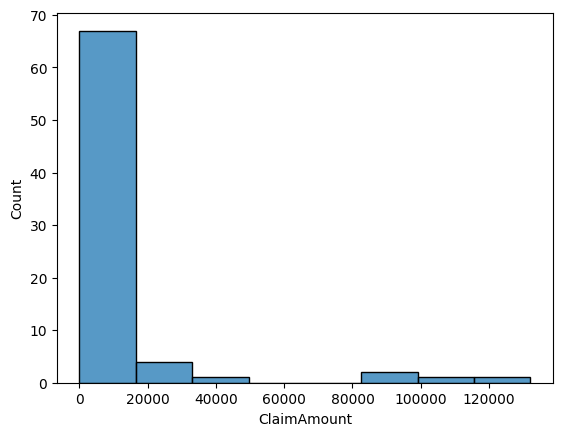

In [56]:
sns.histplot(portfolio.ClaimAmount)

<AxesSubplot: xlabel='premium_charged', ylabel='Count'>

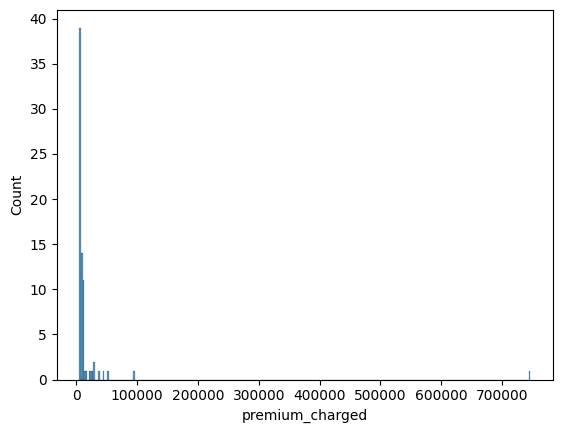

In [57]:
sns.histplot(portfolio.premium_charged)

<AxesSubplot: xlabel='premium_charged', ylabel='ClaimAmount'>

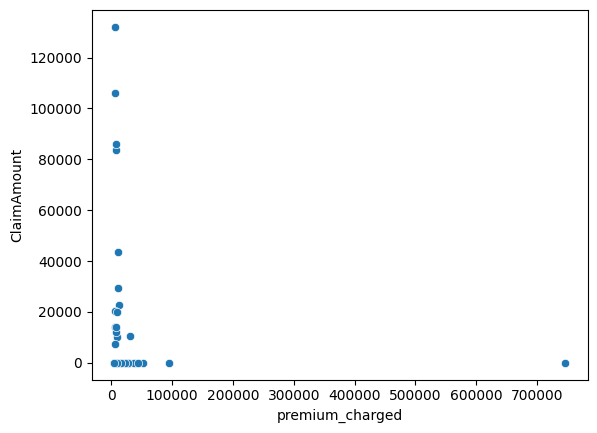

In [58]:
sns.scatterplot(x=portfolio.premium_charged, y=portfolio.ClaimAmount)